In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy.spatial import ConvexHull

In [ ]:
points = np.random.rand(7, 2) 
hull = ConvexHull(points)

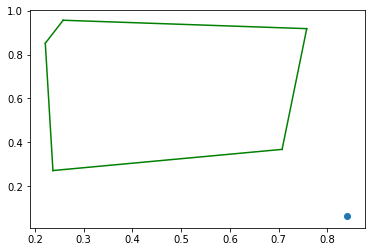

In [52]:
fig, ax = plt.subplots()
num_polygons = 1
num_dots = 1
num_sides = 6

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'g-')
x = np.random.rand(num_dots)
y = np.random.rand(num_dots)

ax.scatter(x,y)
plt.show()


In [38]:
print([tuple(points[i]) for i in hull.vertices])

[(0.22127927823691118, 0.8513552611104092), (0.23698199275360265, 0.2713375465161332), (0.7072393758689615, 0.3678085000854898), (0.7577854558141611, 0.9178938944654952), (0.2579150237472979, 0.9562048994103448)]


In [ ]:
def where_is_dot(dot, A, B):
    a = B[0] - A[0]
    b = B[1] - A[1]
    c = dot[0] - A[0]
    d = dot[1] - A[1]
    return a * d - c * b
    

In [ ]:
def is_intersect(A, B, C, D):
    d1 = where_is_dot(A, C, D)
    d2 = where_is_dot(B, C, D)
    d3 = where_is_dot(C, A, B)
    d4 = where_is_dot(D, A, B)
    return d1 * d2 < 0 and d3 * d4 < 0

In [56]:
def is_contain(point, vertices):
    z = vertices[0]
    start = 1
    end = len(vertices) - 1
    
    while end - start > 1:
        sep = start + end // 2         
        if where_is_dot(point, vertices[start], vertices[sep]) < 0:
            end = sep
        else:
            start = sep
    return not is_intersect(z, point, vertices[start], vertices[end])

In [57]:
is_contain((*x, *y), [tuple(points[i]) for i in hull.vertices])

False

In [53]:
def is_contain_experimental(point, vertices):
    iterator = zip(vertices, vertices[1:] + vertices[:1])
    for A, B in iterator:
        if where_is_dot(point, A, B) < 0:
            return 'Point is external'
    else:
        return 'Point is internal'

In [54]:
is_contain_experimental((*x, *y), [tuple(points[i]) for i in hull.vertices])

'Point is external'